In [2]:
import umap
import numpy as np
import pandas as pd
import requests
import os
import datashader as ds
import datashader.utils as utils
import datashader.transfer_functions as tf
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from mnist.loader import MNIST
%notebook

UsageError: the following arguments are required: filename


In [3]:
#Fashion mnist
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import model_selection
from sklearn import linear_model, ensemble, tree, neighbors, svm

from mnist.loader import MNIST

In [4]:
print("Fetching Fashion-Mnist")
print("=========================")
mndata = MNIST('fashion-mnist/data/fashion')
train, train_labels = mndata.load_training()
test, test_labels = mndata.load_testing()
data = np.array(np.vstack([train, test]), dtype=np.float64) / 255.0
target = np.hstack([train_labels, test_labels])
classes = [
    'T-shirt/top',
    'Trouser', 
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot']
print("Fashion-Mnist loaded")
print ("=========================")

Fetching Fashion-Mnist
Fashion-Mnist loaded


## Generating Control for Two and Three dimensional embedding, static seed

In [5]:
neighbors=15
dim=2
epochs=500
dist=.2

In [6]:
reducer = umap.UMAP(random_state=42,n_epochs=epochs,n_components=dim, n_neighbors=neighbors,min_dist=dist,verbose=1)
embedding_control_2d = reducer.fit_transform(data)


UMAP(min_dist=0.2, n_epochs=500, random_state=42, verbose=1)
Thu Sep  1 08:34:25 2022 Construct fuzzy simplicial set
Thu Sep  1 08:34:25 2022 Finding Nearest Neighbors
Thu Sep  1 08:34:25 2022 Building RP forest with 18 trees
Thu Sep  1 08:34:26 2022 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting after 4 iterations
Thu Sep  1 08:34:38 2022 Finished Nearest Neighbor Search
Thu Sep  1 08:34:40 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Thu Sep  1 08:36:28 2022 Finished embedding


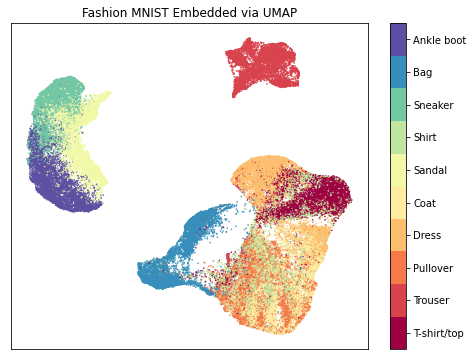

In [7]:

target = np.hstack([train_labels, test_labels])

fig, ax = plt.subplots(1, figsize=(8, 6))
plt.scatter(*embedding_control_2d.T, s=0.3, c=target, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
plt.title('Fashion MNIST Embedded via UMAP control');

In [8]:
reducer = umap.UMAP(random_state=42,n_epochs=epochs,n_components=3, n_neighbors=neighbors,min_dist=dist,verbose=1)
embedding_control_3d = reducer.fit_transform(data)

UMAP(min_dist=0.2, n_components=3, n_epochs=500, random_state=42, verbose=1)
Thu Sep  1 08:38:27 2022 Construct fuzzy simplicial set
Thu Sep  1 08:38:27 2022 Finding Nearest Neighbors
Thu Sep  1 08:38:27 2022 Building RP forest with 18 trees
Thu Sep  1 08:38:28 2022 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting after 4 iterations
Thu Sep  1 08:38:30 2022 Finished Nearest Neighbor Search
Thu Sep  1 08:38:31 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Thu Sep  1 08:40:34 2022 Finished embedding


<IPython.core.display.Javascript object>


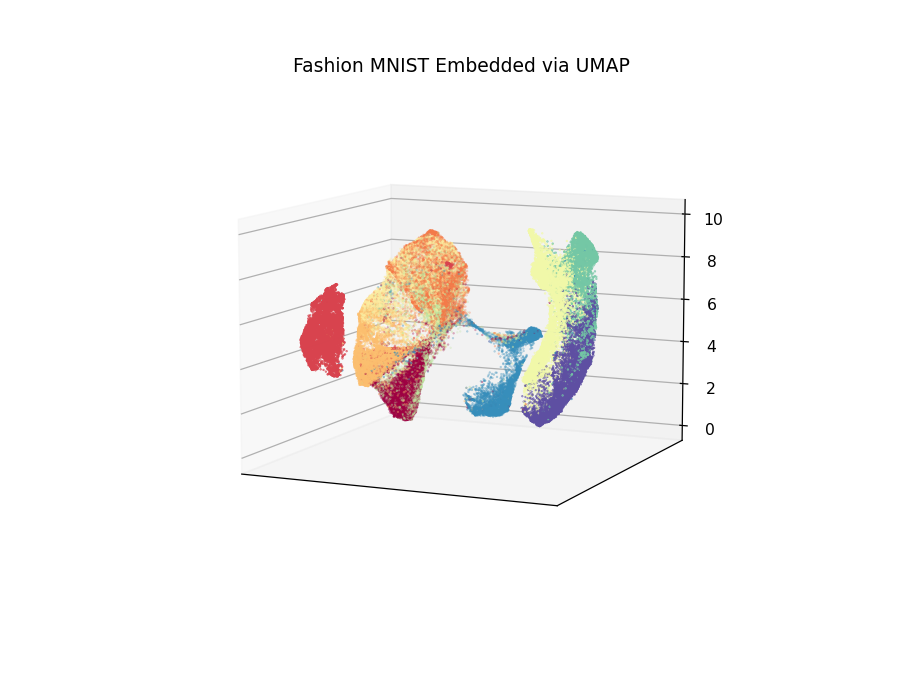

In [15]:
%matplotlib notebook

fig = plt.figure( figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*embedding_control_3d.T, c=target, s=.2,cmap='Spectral')

#plt.scatter(*embedding.T, s=0.3, c=target, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])

plt.title('Fashion MNIST Embedded via UMAP');

## Rotation Invariance testing

We will now test rotation invariance by rotating a portion of the data and examining the impact on the resultant embedding: 
Prediction: Rotation will produce a different embedding with clusters projected symmetrically over a plane in 3d and over a line in 2d

(28, 28)


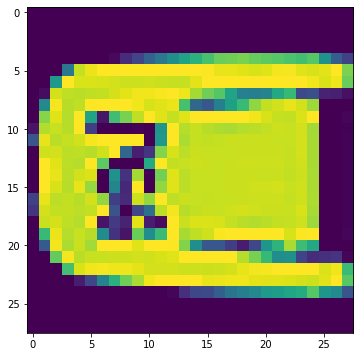

In [13]:
#Sample rotation
x=test[1]
x=np.reshape(x,(28,28))
x=np.transpose(x)
print(np.shape(x))
fig = plt.figure( figsize=(8, 6))
plt.imshow(x, cmap='viridis')
plt.show()

## Rotating 25% of the samples


In [14]:
print(np.shape(data))

784
(70000, 784)


In [17]:
rotation_data=data
for i in range(np.shape(data)[0]):
    if i%4==0: 
        rotation_data[i]=np.reshape(np.transpose(np.reshape(data[i],(28,28))),(784))

In [18]:
reducer = umap.UMAP(random_state=42,n_epochs=epochs,n_components=2, n_neighbors=neighbors,min_dist=dist,verbose=1)
embedding_r25_2d = reducer.fit_transform(rotation_data)

UMAP(min_dist=0.2, n_epochs=500, random_state=42, verbose=1)
Thu Sep  1 08:43:16 2022 Construct fuzzy simplicial set
Thu Sep  1 08:43:16 2022 Finding Nearest Neighbors
Thu Sep  1 08:43:16 2022 Building RP forest with 18 trees
Thu Sep  1 08:43:17 2022 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting after 4 iterations
Thu Sep  1 08:43:20 2022 Finished Nearest Neighbor Search
Thu Sep  1 08:43:20 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Thu Sep  1 08:45:08 2022 Finished embedding


In [ ]:

target = np.hstack([train_labels, test_labels])

fig, ax = plt.subplots(1, figsize=(8, 6))

plt.scatter(*embedding_r25_2d.T, s=0.3, c=target, cmap='Spectral', alpha=.1)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
plt.title('Rotation Embedding Superimposed(low opacity) over Control Embedding');

<IPython.core.display.Javascript object>


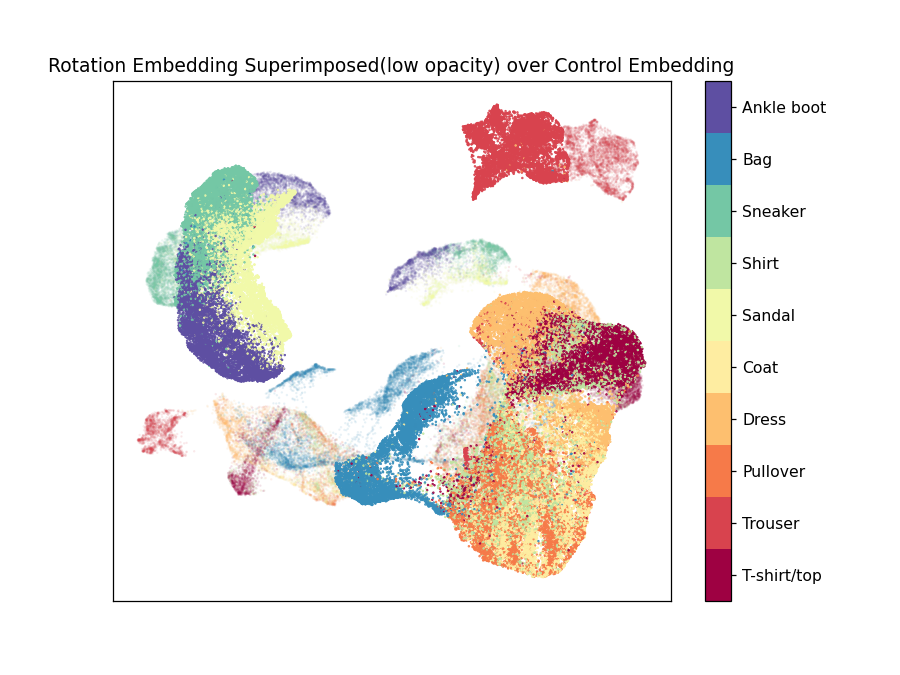

In [35]:

target = np.hstack([train_labels, test_labels])

fig, ax = plt.subplots(1, figsize=(8, 6))

plt.scatter(*embedding_r25_2d.T, s=0.3, c=target, cmap='Spectral', alpha=.1)
plt.scatter(*embedding_control_2d.T, s=0.3, c=target, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
plt.title('Rotation Embedding Superimposed(low opacity) over Control Embedding');

outcome: It is clear that UMAP is not rotationally invariant due to the fact that given the same random seed for the stochastic initialization the embedding differed in the presence of rotational asymmetries in the data 


## Translation Invariance testing 

We will now test translation invariance by translating a portion of the data, then the entire data set to observe the embedding result.
Prediction: I think that translation may effect the data due to the impact on the nearest neighboor algorithm

## Translating 25% of the data

Translation matrix: 
$$ \begin{bmatrix}
\mathbb{I}_{784} &T_1\\
\mathbb{I}_{784} &T_2\\
\vdots &\vdots\\
\mathbb{I}_{784} &T_{784}\\
\vec{0}&1\\
\end{bmatrix}
$$

In [67]:
t_data=data
dim=np.shape(data)[1]

translation_matrix=np.eye(dim)
translation_matrix=np.hstack([translation_matrix, np.full((dim, 1), 4)])
zeros=np.zeros((1,dim+1))
zeros[0][dim]=1
translation_matrix=np.vstack([translation_matrix, zeros])

In [93]:
t_data=data
for i in range(np.shape(data)[0]):
    if i%4==0: 
        temp = np.append(data[i], 1)
        temp=translation_matrix@(temp)
        temp=np.delete(temp,784,0)
        t_data[i]=temp

In [94]:
reducer = umap.UMAP(random_state=42,n_epochs=epochs,n_components=2, n_neighbors=neighbors,min_dist=dist,verbose=1)
embedding_t_2d = reducer.fit_transform(t_data)

UMAP(min_dist=0.2, n_epochs=500, random_state=42, verbose=1)
Thu Sep  1 09:34:35 2022 Construct fuzzy simplicial set
Thu Sep  1 09:34:35 2022 Finding Nearest Neighbors
Thu Sep  1 09:34:35 2022 Building RP forest with 18 trees
Thu Sep  1 09:34:36 2022 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	Stopping threshold met -- exiting after 3 iterations
Thu Sep  1 09:34:39 2022 Finished Nearest Neighbor Search
Thu Sep  1 09:34:39 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Thu Sep  1 09:36:25 2022 Finished embedding


<IPython.core.display.Javascript object>


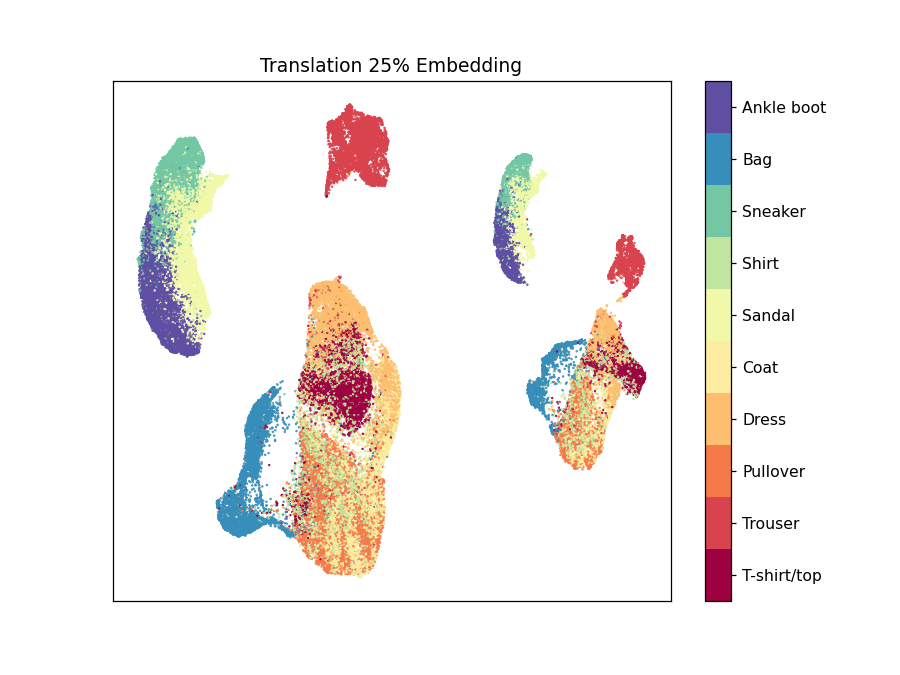

In [101]:

target = np.hstack([train_labels, test_labels])

fig, ax = plt.subplots(1, figsize=(8, 6))
plt.scatter(*embedding_t_2d.T, s=0.3, c=target, cmap='Spectral', alpha=1)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
plt.title('Translation 25% Embedding');

<IPython.core.display.Javascript object>


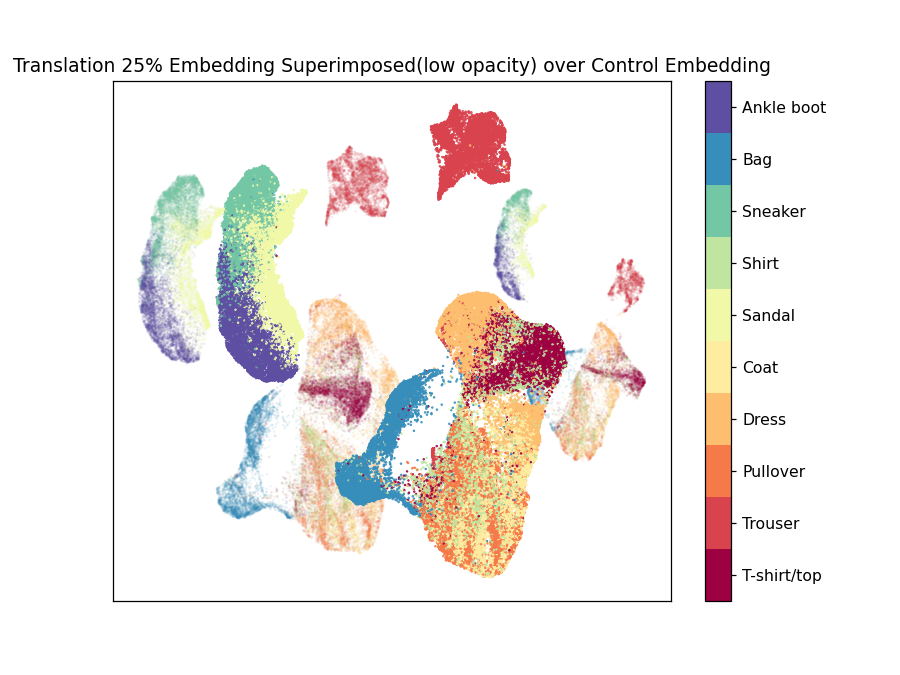

In [102]:

target = np.hstack([train_labels, test_labels])

fig, ax = plt.subplots(1, figsize=(8, 6))
plt.scatter(*embedding_t_2d.T, s=0.3, c=target, cmap='Spectral', alpha=.1)
plt.scatter(*embedding_control_2d.T, s=0.3, c=target, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
plt.title('Translation 25% Embedding Superimposed(low opacity) over Control Embedding');

In [98]:
reducer = umap.UMAP(random_state=42,n_epochs=epochs,n_components=3, n_neighbors=neighbors,min_dist=dist,verbose=1)
embedding_t_3d = reducer.fit_transform(t_data)

UMAP(min_dist=0.2, n_components=3, n_epochs=500, random_state=42, verbose=1)
Thu Sep  1 09:38:02 2022 Construct fuzzy simplicial set
Thu Sep  1 09:38:02 2022 Finding Nearest Neighbors
Thu Sep  1 09:38:02 2022 Building RP forest with 18 trees
Thu Sep  1 09:38:03 2022 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	Stopping threshold met -- exiting after 3 iterations
Thu Sep  1 09:38:06 2022 Finished Nearest Neighbor Search
Thu Sep  1 09:38:06 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Thu Sep  1 09:40:02 2022 Finished embedding


<IPython.core.display.Javascript object>


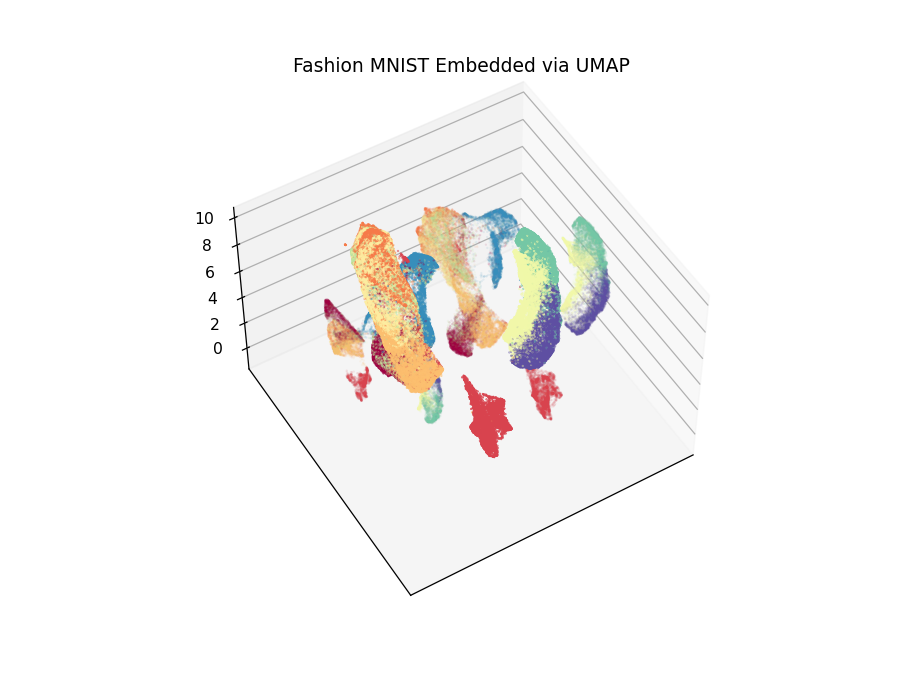

In [99]:
%matplotlib notebook

fig = plt.figure( figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*embedding_control_3d.T, c=target, s=.2,cmap='Spectral')
ax.scatter(*embedding_t_3d.T, c=target, s=.2,cmap='Spectral',alpha=.1)
#plt.scatter(*embedding.T, s=0.3, c=target, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])

plt.title('Fashion MNIST Embedded via UMAP');

## Translating 100% of the data

In [103]:
t100_data=data
for i in range(np.shape(data)[0]):
        temp = np.append(data[i], 1)
        temp=translation_matrix@(temp)
        temp=np.delete(temp,784,0)
        t_data[i]=temp

In [106]:
reducer = umap.UMAP(random_state=42,n_epochs=epochs,n_components=2, n_neighbors=neighbors,min_dist=dist,verbose=1)
embedding_t100_2d = reducer.fit_transform(t100_data)

UMAP(min_dist=0.2, n_epochs=500, random_state=42, verbose=1)
Thu Sep  1 09:46:07 2022 Construct fuzzy simplicial set
Thu Sep  1 09:46:07 2022 Finding Nearest Neighbors
Thu Sep  1 09:46:07 2022 Building RP forest with 18 trees
Thu Sep  1 09:46:08 2022 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	Stopping threshold met -- exiting after 3 iterations
Thu Sep  1 09:46:11 2022 Finished Nearest Neighbor Search
Thu Sep  1 09:46:11 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Thu Sep  1 09:47:56 2022 Finished embedding


<IPython.core.display.Javascript object>


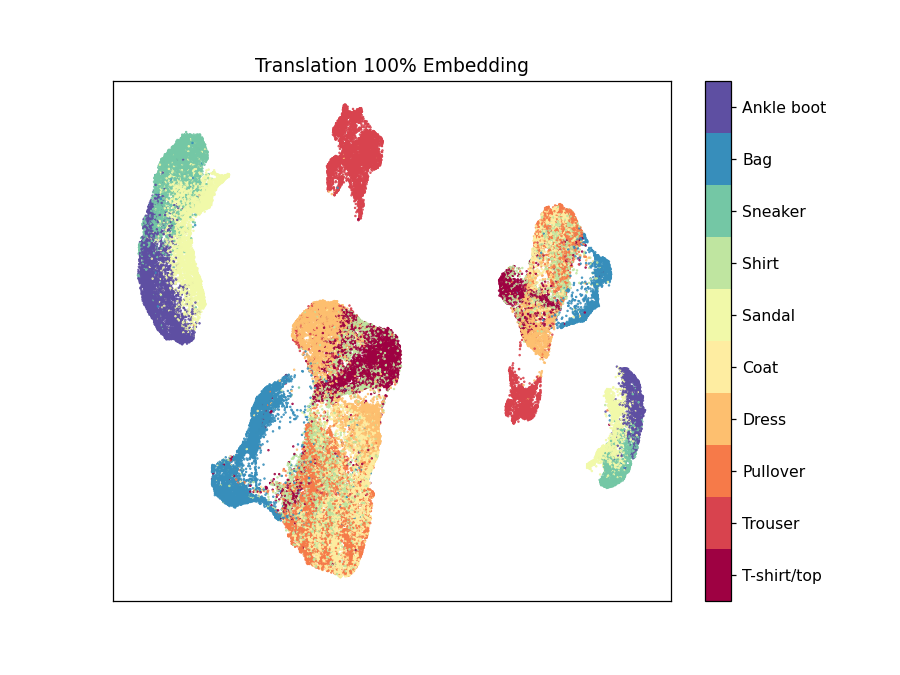

In [109]:

target = np.hstack([train_labels, test_labels])

fig, ax = plt.subplots(1, figsize=(8, 6))
plt.scatter(*embedding_t100_2d.T, s=0.3, c=target, cmap='Spectral', alpha=1)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
plt.title('Translation 100% Embedding');

<IPython.core.display.Javascript object>


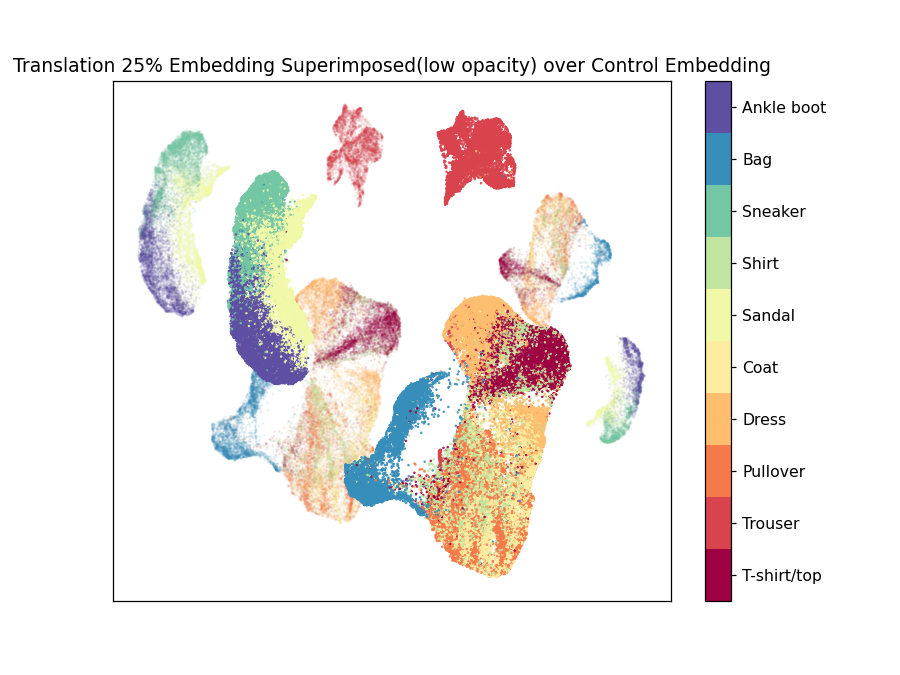

In [128]:

target = np.hstack([train_labels, test_labels])

fig, ax = plt.subplots(1, figsize=(8, 6))
plt.scatter(*embedding_t100_2d.T, s=0.3, c=target, cmap='Spectral', alpha=.1)
plt.scatter(*embedding_control_2d.T, s=0.3, c=target, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
plt.title('Translation 25% Embedding Superimposed(low opacity) over Control Embedding');

Very strange behavior here, I expected a uniform shift for 100% translation and the difference between 25% and 100% feels inaccurate. Translation matrix might be slightly incorrect, will review 

In [ ]:
##

## Scale invariance testing 

We will now test scale invariance by scaling a portion of the data, then the entire data set and examining the impact on the resultant embedding: 
Prediction:Scaling will fail for local changes but will work for global 

Scale matrix:
$$ \begin{bmatrix}
c*\mathbb{I}_{784}& 0\\
 \vdots& \vdots\\
c*\mathbb{I}_{784}& 0\\
\vec{0}& 1
\end{bmatrix}
$$

<IPython.core.display.Javascript object>


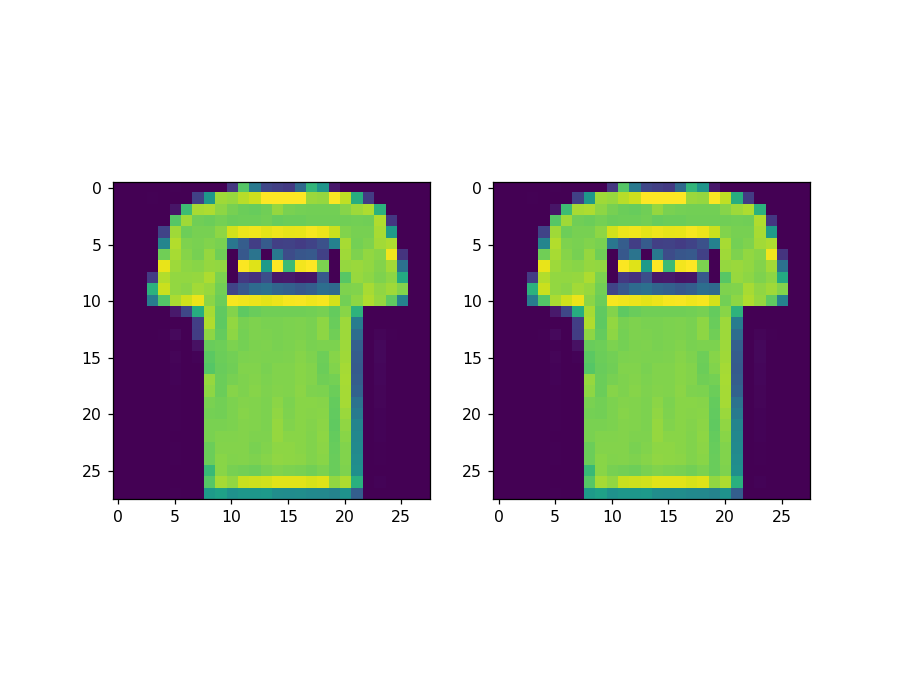

497.36945102330765


In [138]:
s_data=data
dim=np.shape(data)[1]
scale_matrix=5*np.eye(dim)
scale_matrix=np.hstack([scale_matrix, np.zeros((dim,1))])
zeros=np.zeros((1,dim+1))
zeros[0][dim]=1
scale_matrix=np.vstack([scale_matrix, zeros])

temp = np.append(data[1], 1)
temp=scale_matrix@temp
temp=np.delete(temp,784,0)

temp=np.reshape(temp,(28,28))

fig = plt.figure( figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.imshow(temp, cmap='viridis')
plt.show()




plt.subplot(1, 2, 2)
plt.imshow(np.reshape(data[1],(28,28)), cmap='viridis')
plt.show()
print(np.linalg.norm(np.reshape(temp,(784,1)))-np.linalg.norm(data[1])) 
#matrices are clearly different yet can be plotted in the same axis?


In [140]:
s25_data=data
for i in range(np.shape(data)[0]):
    if i %4==0:
        temp = np.append(data[1], 1)
        temp=scale_matrix@temp
        temp=np.delete(temp,784,0)
        t_data[i]=temp

In [141]:

reducer = umap.UMAP(random_state=42,n_epochs=epochs,n_components=2, n_neighbors=neighbors,min_dist=dist,verbose=1)
embedding_s25_2d = reducer.fit_transform(s25_data)

UMAP(min_dist=0.2, n_epochs=500, random_state=42, verbose=1)
Thu Sep  1 11:01:50 2022 Construct fuzzy simplicial set
Thu Sep  1 11:01:50 2022 Finding Nearest Neighbors
Thu Sep  1 11:01:50 2022 Building RP forest with 18 trees
Thu Sep  1 11:01:51 2022 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	Stopping threshold met -- exiting after 3 iterations
Thu Sep  1 11:01:53 2022 Finished Nearest Neighbor Search
Thu Sep  1 11:01:53 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Thu Sep  1 11:04:15 2022 Finished embedding


<IPython.core.display.Javascript object>


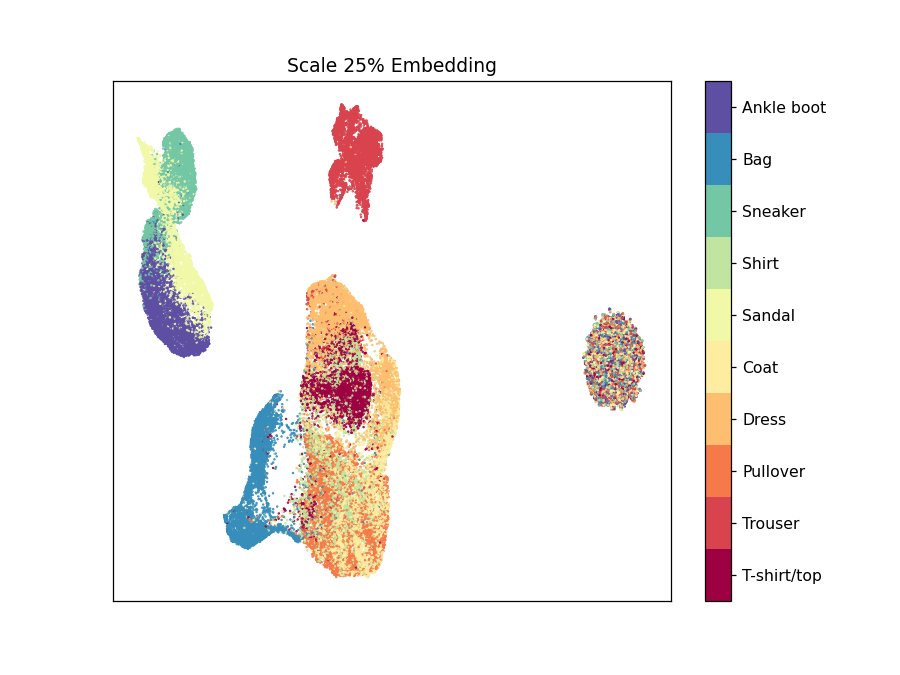

In [142]:

target = np.hstack([train_labels, test_labels])

fig, ax = plt.subplots(1, figsize=(8, 6))
plt.scatter(*embedding_s25_2d.T, s=0.3, c=target, cmap='Spectral', alpha=1)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
plt.title('Scale 25% Embedding');

<IPython.core.display.Javascript object>


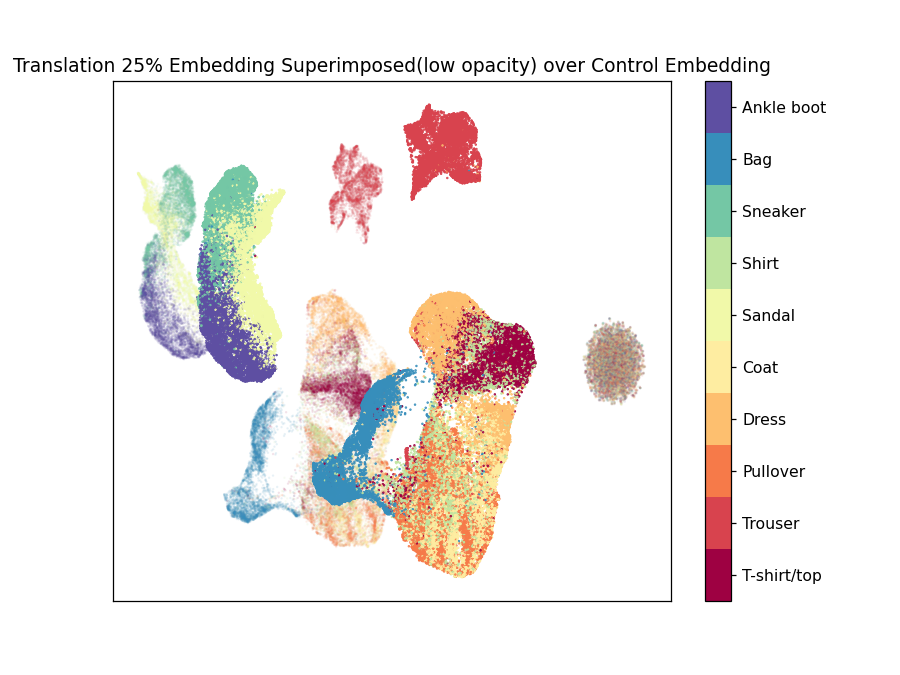

In [143]:

target = np.hstack([train_labels, test_labels])

fig, ax = plt.subplots(1, figsize=(8, 6))
plt.scatter(*embedding_s25_2d.T, s=0.3, c=target, cmap='Spectral', alpha=.1)
plt.scatter(*embedding_control_2d.T, s=0.3, c=target, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
plt.title('Translation 25% Embedding Superimposed(low opacity) over Control Embedding');